# 공지사항

## 3. 모델링 및 모델해석 (1 Day)
- 기준모델baseline model 선정, 모델링 성능 평가
- 반복적인 Feature Engineering을 통해 모델 성능 최적화
- 문제 정의에 맞는 평가지표 선택, 모델 성능 설명
- 교차검증이나 hold-out 기법을 사용해 학습 성능/일반화 성능 구분하여 제시
- 여러 수치적 지표 및 permutation importance, pdp, shap 등을 활용해 최종모델 설명 (시각화는 설명이 가장 중요)
- 1.에서 제시한 가설 해결

Q1. 학습한 모델이 기준모델보다 성능이 잘 나왔나? 그렇지 않다면 이유는?<br>
Q2. 모델 성능 개선을 위해 어떤 방법을 적용했나? 그 방법을 선택한 이유는?<br>
Q3. 최종 모델과 일반화 성능에 관해 설명<br>
Q4. 모델이 관측치를 예측하기 위해 어떤 특성을 활용했나?

## 4. 발표자료 준비 및 제출 (0.5 Day)
- 프로젝트 결과를 정리하여 발표자료 제작
- 청자는 비데이터 직군 가정 
- 설정한 가설의 해소 과정(본인의 프로젝트 논리 전개 과정)을 꼼꼼히 담아보기
- 본인의 프로젝트 회고 + 보완할 점 제시

# Load train data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/train1.csv'

In [ ]:
import pandas as pd
data = pd.read_csv(filename)
data = data.drop(axis = 1, columns = ['Unnamed: 0'])
print(data.shape) # (5410, 39)

(5410, 39)


In [ ]:
data.head(2)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Duration_IP,Claim_Period,Claimed_extra,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,...,PerProvider_mean_Patient_Risk_Score,PerProvider_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5,PerProvider_count_Claims,Age_average
0,PRV51001,No,104640,5340.0,30.0,30.0,0.0,5,8,300,...,0.009408,0.040000,9.0,16.0,21.0,4.0,0.0,0.0,25,79.0
1,PRV51003,Yes,605670,66286.0,382.0,382.0,0.0,62,29,1560,...,0.000273,0.007576,54.0,78.0,107.0,24.0,0.0,1.0,132,70.0


타겟 라벨 변환 ('Yes': 1 / 'No': 0)

In [ ]:
data.PotentialFraud.replace(['Yes', 'No'], ['1', '0'], inplace = True)
data.PotentialFraud = data.PotentialFraud.astype('int64')

Train/Test split (80/20)

In [ ]:
from sklearn.model_selection import train_test_split
target = 'PotentialFraud'
train, test = train_test_split(data, test_size = 0.2, stratify = data[target])
print(train.shape, test.shape) # (4328, 245) (1082, 245) > (4328, 39) (1082, 39)

(4328, 39) (1082, 39)


# 기준모델baseline model 선정, 모델링 성능 평가

In [ ]:
# 0 = No, 1 = Yes
target = 'PotentialFraud'

In [ ]:
# 타겟 데이터 범주의 비율 확인
y_train = train[target]
y_train.value_counts(normalize = True) # 불균형 클래스

0    0.906423
1    0.093577
Name: PotentialFraud, dtype: float64

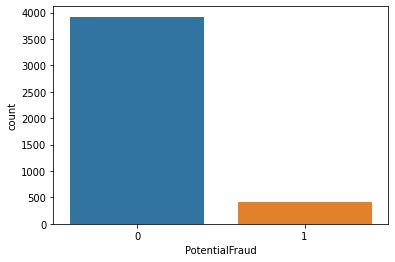

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x = y_train)

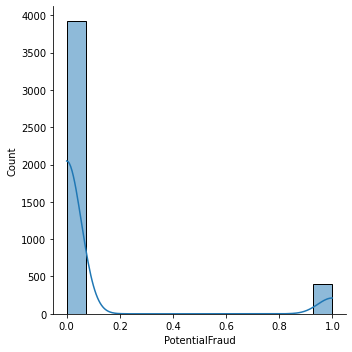

In [ ]:
sns.displot(y_train, kde = True)

In [ ]:
major = y_train.mode()[0]
y_pred = [major] * len(y_train)

In [ ]:
# 기준모델의 성능 평가 (정확도 accuracy)
from sklearn.metrics import accuracy_score
print("기준모델 학습 정확도: ", accuracy_score(y_train, y_pred)) # 최다 클래스의 빈도 = 정확도

# 기준모델 학습 정확도:  0.9064232902033271 (약 90.6%)

기준모델 학습 정확도:  0.9064232902033271


In [ ]:
# 검증 세트에서의 정확도
train, val = train_test_split(train, test_size = 0.2, stratify = train[target])
print(train.shape, val.shape) # (3462, 245) (866, 245) > (3462, 39) (866, 39)

(3462, 39) (866, 39)


In [ ]:
y_val = val[target]
major1 = y_val.mode()[0]
y_pred_val = [major1] * len(y_val)
print("기준모델 검증 정확도: ", accuracy_score(y_val, y_pred_val))

# 기준모델 검증 정확도:  0.9066543438077634 (약 90.6%)

기준모델 검증 정확도:  0.9064665127020786


## X, y

In [ ]:
# target = 'PotentialFraud'
features = train.drop(columns = [target, 'Provider']).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
# y_test = test[target]

print("X_train: ", X_train.shape) # (3462, 243)
print("y_train: ", y_train.shape) # (3462,)
print("X_val: ", X_val.shape) # (866, 243)
print("y_val: ", y_val.shape) # (1082, )
print("X_test: ", X_test.shape) # (1082, 243)
# print("y_test: ", y_test.shape) # 

X_train:  (3462, 37)
y_train:  (3462,)
X_val:  (866, 37)
y_val:  (866,)
X_test:  (1082, 37)


## Standardize train/test data

In [ ]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
standardscaler.fit(X_train)
X_train_std = standardscaler.transform(X_train)
X_val_std = standardscaler.transform(X_val)
X_test_std = standardscaler.transform(X_test)

## Oversampling with SMOTE fit_resample()

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 15.4 MB/s 
     |████████████████████████████████| 199 kB 61.9 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ", X_train.shape, y_train.shape)
print("SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ", X_train_over.shape, y_train_over.shape)
print("SMOTE 적용 후 레이블 값의 분포 :\n", pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (3462, 37) (3462,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (6276, 37) (6276,)
SMOTE 적용 후 레이블 값의 분포 :
 0    3138
1    3138
Name: PotentialFraud, dtype: int64


**SMOTE 전 클래스 확인**

In [ ]:
from collections import Counter
counter1 = Counter(y_train)
print(counter1)

Counter({0: 3138, 1: 324})


In [ ]:
non_fraud = counter1[0]/(counter1[0]+counter1[1])
fraud = counter1[1]/(counter1[0]+counter1[1])
# {.2f}%.format()
print("Non-fraud % : {:.2f}%".format(non_fraud*100))
print("Fraud % : {:.2f}%".format(fraud*100))

Non-fraud % : 90.64%
Fraud % : 9.36%


Text(0.5, 1.0, 'Class (befoer SMOTE)')

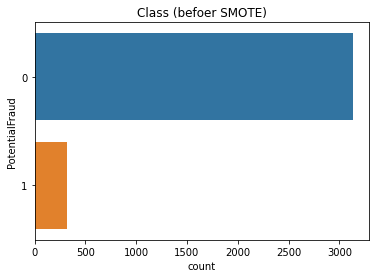

In [ ]:
import seaborn as sns
sns.countplot(y=y_train)
plt.title('Class (befoer SMOTE)')

**SMOTE 후 클래스 확인**

In [ ]:
counter2 = Counter(y_train_over)
print(counter2)

Counter({0: 3138, 1: 3138})


In [ ]:
non_fraud = counter2[0]/(counter2[0]+counter1[1])
fraud = counter2[1]/(counter2[0]+counter1[1])

print("Non-fraud % : {:.2f}%".format(non_fraud*100))
print("Fraud % : {:.2f}%".format(fraud*100))

Non-fraud % : 90.64%
Fraud % : 90.64%


Text(0.5, 1.0, 'Class (after SMOTE)')

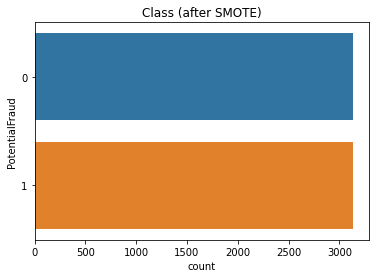

In [ ]:
sns.countplot(y=y_train_over)
plt.title('Class (after SMOTE)')

# Modelling

## 모델 구축<br>
1. LogisticRegression <br>
2. DecisionTreeClassifier <br>
3. RandomForestClassifier <br>
4. XGBClassifier <br>
5. AdaBoost

In [ ]:
# 분류 모델
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 앙상블 모델
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
# from sklearn import svm
# from sklearn.svm import SVC, LinearSVC

# 모델 검정
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

from scipy.stats import randint, uniform

# 검정결과 시각화
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 최적화
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import cross_val_score # 교차타당도

In [ ]:
logistic_r = LogisticRegression(
    solver = 'liblinear', 
    penalty = 'l2', 
    C = 1.0
    )

decision_tree = DecisionTreeClassifier(
    criterion = 'entropy', 
    # maX_features = 1,
    min_samples_leaf = 1
    ) 

randomforestclf = RandomForestClassifier(
    criterion = 'gini', 
    n_estimators = 100
    )

xgboost = XGBClassifier(
    learning_rate = 1,
    max_depth = 10, 
    n_estimators = 100
    )

adaboost = AdaBoostClassifier(
    base_estimator = decision_tree,
    n_estimators = 200, 
    learning_rate = 0.1
    )

## 모델 검증: 1) cross_val_score 2) ROC curve
- 반복적인 Feature Engineering을 통해 모델 성능 최적화
- 문제 정의에 맞는 평가지표 선택, 모델 성능 설명 (confusion_matrix, f1_score, roc/auc, classification_report)

### **LogisticRegression, DecisionTreeClassifier**

In [ ]:
logistic_r = LogisticRegression(
    solver = 'liblinear', 
    penalty = 'l2', 
    C = 1.0
    )

decision_tree = DecisionTreeClassifier(
    criterion = 'entropy', 
    # maX_features = 1,
    min_samples_leaf = 1
    ) 

models = [logistic_r, decision_tree]
labels = ['Logistic Regression', 'DecisionTreeClassifier']

for model, label in zip(models, labels):
    scores = cross_val_score(
        estimator = model, 
        X = X_train_over, y = y_train_over, 
        cv = 10, 
        scoring = 'roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]" %(scores.mean(), scores.std(), label))

ROC AUC: 0.933 (+/- 0.012) [Logistic Regression]
ROC AUC: 0.925 (+/- 0.028) [DecisionTreeClassifier]


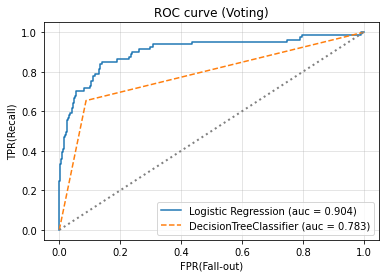

In [ ]:
logistic_r = LogisticRegression(
    solver = 'liblinear', 
    penalty = 'l2', 
    C = 1.0
    )

decision_tree = DecisionTreeClassifier(
    criterion = 'entropy', 
    # maX_features = 1,
    min_samples_leaf = 1
    ) 

models = [logistic_r, decision_tree]
labels = ['Logistic Regression', 'DecisionTreeClassifier']
linestyles = ['-', '--']
colors = ['orange', 'blue']

for model, label, color, ls in zip(models, labels, colors, linestyles):
    model.fit(X_train_over, y_train_over)
    pred_proba = model.predict_proba(X_val)[:,1]

    fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
    roc = pd.DataFrame({
        'FPR(Fall-out)': fpr,
        'TPR(Recall)': tpr,
        'Threshold': thresholds
    })
    plt.plot(fpr, tpr, linestyle = ls, label = '%s (auc = %0.3f)' %(label, auc(fpr, tpr)))

plt.legend(loc = 'lower right')
plt.grid(alpha = 0.4)
plt.title('ROC curve (Voting)')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.plot([0, 1], [0, 1], linestyle = ':', color = 'grey', linewidth = 2)

plt.show()

In [ ]:
#def predict_label(clf, data):
#    pred_prob = clf.predict_proba(data)[:,1]
#    return pred_prob

def get_clf_eval(y_true, y_pred, y_pred_proba):
    print('Confusion Matrix :\n', confusion_matrix(y_true, y_pred)) # "오차행렬"
    print('Accuracy : ', accuracy_score(y_true, y_pred))
    print('Precision : ', precision_score(y_true, y_pred))
    print('Recall : ', recall_score(y_true, y_pred))
    print('f1 score : ', f1_score(y_true, y_pred))
    print('roc_auc score : ', roc_auc_score(y_true, y_pred_proba))

def get_model_eval(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val) # 예측 확률값
    y_pred_proba = model.predict_proba(X_val)[:,1] # 1의 확률 array
    get_clf_eval(y_val, y_pred, y_pred_proba)

In [ ]:
get_model_eval(logistic_r, X_train_over, X_val, y_train_over, y_val)
print('--------------------------------------------------------------')
get_model_eval(decision_tree, X_train_over, X_val, y_train_over, y_val)

Confusion Matrix :
 [[656 129]
 [ 12  69]]
Accuracy :  0.8371824480369515
Precision :  0.3484848484848485
Recall :  0.8518518518518519
f1 score :  0.4946236559139786
roc_auc score :  0.9040025163167413
--------------------------------------------------------------
Confusion Matrix :
 [[709  76]
 [ 28  53]]
Accuracy :  0.8799076212471132
Precision :  0.4108527131782946
Recall :  0.654320987654321
f1 score :  0.5047619047619047
roc_auc score :  0.7787528505150586


### **RandomForest**

In [ ]:
decision_tree = DecisionTreeClassifier(
    criterion = 'entropy', 
    # maX_features = 1,
    min_samples_leaf = 1
    ) 

random_forest = RandomForestClassifier(
    criterion = 'gini', 
    n_estimators = 100
    )
models = [decision_tree, random_forest]
labels = ['DecisionTreeClassifier', 'RandomForestClassifier']

for model, label in zip(models, labels):
    scores = cross_val_score(
        estimator = model, 
        X = X_train_over, y = y_train_over, 
        cv = 10, 
        scoring = 'roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]" %(scores.mean(), scores.std(), label))

ROC AUC: 0.925 (+/- 0.027) [DecisionTreeClassifier]
ROC AUC: 0.990 (+/- 0.009) [RandomForestClassifier]


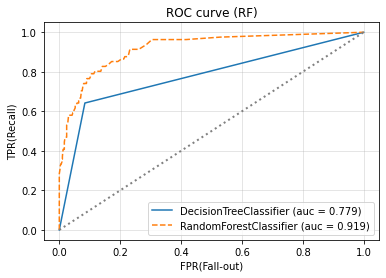

In [ ]:
decision_tree = DecisionTreeClassifier(
    criterion = 'entropy', 
    # maX_features = 1,
    min_samples_leaf = 1
    ) 

random_forest = RandomForestClassifier(
    criterion = 'gini', 
    n_estimators = 100
    )
models = [decision_tree, random_forest]
labels = ['DecisionTreeClassifier', 'RandomForestClassifier']
linestyles = ['-', '--']
colors = ['orange', 'blue']

for model, label, color, ls in zip(models, labels, colors, linestyles):
    model.fit(X_train_over, y_train_over)
    pred_proba = model.predict_proba(X_val)[:,1]

    fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
    roc = pd.DataFrame({
        'FPR(Fall-out)': fpr,
        'TPR(Recall)': tpr,
        'Threshold': thresholds
    })
    plt.plot(fpr, tpr, linestyle = ls, label = '%s (auc = %0.3f)' %(label, auc(fpr, tpr)))

plt.legend(loc = 'lower right')
plt.grid(alpha = 0.4)
plt.title('ROC curve (RF)')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.plot([0, 1], [0, 1], linestyle = ':', color = 'grey', linewidth = 2)

plt.show()



In [ ]:
get_model_eval(decision_tree, X_train_over, X_val, y_train_over, y_val)

Confusion Matrix :
 [[712  73]
 [ 32  49]]
Accuracy :  0.8787528868360277
Precision :  0.4016393442622951
Recall :  0.6049382716049383
f1 score :  0.48275862068965525
roc_auc score :  0.755972320515845


In [ ]:
get_model_eval(random_forest, X_train_over, X_val, y_train_over, y_val)

Confusion Matrix :
 [[738  47]
 [ 29  52]]
Accuracy :  0.9122401847575058
Precision :  0.5252525252525253
Recall :  0.6419753086419753
f1 score :  0.5777777777777777
roc_auc score :  0.9170716363922309


### **Boosting**

In [ ]:
xgboost = XGBClassifier(
    learning_rate = 1,
    max_depth = 10, 
    n_estimators = 100
    )

adaboost = AdaBoostClassifier(
    base_estimator = decision_tree,
    n_estimators = 200, 
    learning_rate = 0.1
    )
models = [xgboost, adaboost]
labels = ['XGBClassifier', 'AdaBoostClassifier']

for model, label in zip(models, labels):
    scores = cross_val_score(
        estimator = model, 
        X = X_train_over, y = y_train_over, 
        cv = 10, 
        scoring = 'roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]" %(scores.mean(), scores.std(), label))

ROC AUC: 0.992 (+/- 0.015) [XGBClassifier]
ROC AUC: 0.925 (+/- 0.027) [AdaBoostClassifier]


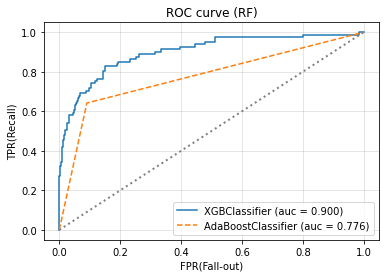

In [ ]:
xgboost = XGBClassifier(
    learning_rate = 1,
    max_depth = 10, 
    n_estimators = 100
    )

adaboost = AdaBoostClassifier(
    base_estimator = decision_tree,
    n_estimators = 200, 
    learning_rate = 0.1
    )
models = [xgboost, adaboost]
labels = ['XGBClassifier', 'AdaBoostClassifier']
linestyles = ['-', '--']
colors = ['orange', 'blue']

for model, label, color, ls in zip(models, labels, colors, linestyles):
    model.fit(X_train_over, y_train_over)
    pred_proba = model.predict_proba(X_val)[:,1]

    fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
    roc = pd.DataFrame({
        'FPR(Fall-out)': fpr,
        'TPR(Recall)': tpr,
        'Threshold': thresholds
    })
    plt.plot(fpr, tpr, linestyle = ls, label = '%s (auc = %0.3f)' %(label, auc(fpr, tpr)))

plt.legend(loc = 'lower right')
plt.grid(alpha = 0.4)
plt.title('ROC curve (RF)')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.plot([0, 1], [0, 1], linestyle = ':', color = 'grey', linewidth = 2)

plt.show()

In [ ]:
get_model_eval(xgboost, X_train_over, X_val, y_train_over, y_val)

Confusion Matrix :
 [[752  33]
 [ 34  47]]
Accuracy :  0.9226327944572749
Precision :  0.5875
Recall :  0.5802469135802469
f1 score :  0.5838509316770186
roc_auc score :  0.899646142958245


In [ ]:
get_model_eval(adaboost, X_train_over, X_val, y_train_over, y_val)

Confusion Matrix :
 [[722  63]
 [ 34  47]]
Accuracy :  0.8879907621247113
Precision :  0.42727272727272725
Recall :  0.5802469135802469
f1 score :  0.49214659685863876
roc_auc score :  0.7499960682550916


### 모델 선택

In [ ]:
!pip install beautifultable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = ['Model Name', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
table.append_row(['Logistic Regression', '0.3485', '0.8519', '0.4946', '0.9040'])
table.append_row(['Decision Tree', '0.4109', '0.6543', '0.5048', '0.7788'])
table.append_row(['RandomForest', '0.5252', '0.6420', '0.5778', '0.9170'])
table.append_row(['XGBoost', '0.5875', '0.5802', '0.5839', '0.9'])
table.append_row(['AdaBoost', '0.3485', '0.8519', '0.4946', '0.9040'])
print(table)

#--------------------------------------------------------------
#Precision :  0.4108527131782946
#Recall :  0.654320987654321
#f1 score :  0.5047619047619047
#roc_auc score :  0.7787528505150586
#--------------------------------------------------------------
#Precision :  0.5252525252525253
#Recall :  0.6419753086419753
#f1 score :  0.5777777777777777
#roc_auc score :  0.9170716363922309
#--------------------------------------------------------------
#Precision :  0.5875
#Recall :  0.5802469135802469
#f1 score :  0.5838509316770186
#roc_auc score :  0.899646142958245
#--------------------------------------------------------------
#Precision :  0.3484848484848485
#Recall :  0.8518518518518519
#f1 score :  0.4946236559139786
#roc_auc score :  0.9040025163167413

+---------------------+-----------+--------+----------+---------------+
|     Model Name      | Precision | Recall | F1 Score | ROC AUC Score |
+---------------------+-----------+--------+----------+---------------+
| Logistic Regression |   0.348   | 0.852  |  0.495   |     0.904     |
+---------------------+-----------+--------+----------+---------------+
|    Decision Tree    |   0.411   | 0.654  |  0.505   |     0.779     |
+---------------------+-----------+--------+----------+---------------+
|    RandomForest     |   0.525   | 0.642  |  0.578   |     0.917     |
+---------------------+-----------+--------+----------+---------------+
|       XGBoost       |   0.588   |  0.58  |  0.584   |      0.9      |
+---------------------+-----------+--------+----------+---------------+
|      AdaBoost       |   0.348   | 0.852  |  0.495   |     0.904     |
+---------------------+-----------+--------+----------+---------------+


- **결론**: f1-score과 AUC score 모두 고려했을 때  **RandomForestClassifier** 모델의 성능이 가장 높게 나타남.
(뒤이어 XGBoost (f1-score는 근소하게 더 높음) > AdaBoost (ROC AUC score은 근소하게 더 높음)

In [ ]:
# NOTE.

# 상기 beautifultable 작성 부분 전후로 상이한 시점의 2개 결과 혼재,
# 이후 부분의 발표자료/영상-코드 간 수치 상 차이 존재 (시간 상의 이유로 수정하지 못함)
# RandomForestClassifier 모델 선택 진행 흐름은 동일함.

# 로지스틱회귀
#Precision :  0.13559322033898305
#Recall :  0.9876543209876543
#f1 score :  0.23845007451564829
#roc_auc score :  0.9373122591806243
#---
# 의사결정나무
#Precision :  0.45098039215686275
#Recall :  0.5679012345679012
#f1 score :  0.5027322404371584
#roc_auc score :  0.7482818274750334
#---
# 랜덤포레스트 (선택)
#Precision :  0.5288461538461539
#Recall :  0.6790123456790124
#f1 score :  0.5945945945945946 (v)
#roc_auc score :  0.9185656994574192 (v)
#---
# XGBClassifier
#Precision :  0.5316455696202531
#Recall :  0.5185185185185185
#f1 score :  0.525
#roc_auc score :  0.876260124243139
#---
# AdaBoost
#Precision :  0.4519230769230769
#Recall :  0.5802469135802469
#f1 score :  0.5081081081081081
#roc_auc score :  0.753817724306047

# 최적화

## 하이퍼파라미터 튜닝

### RandomForestClassifier()

In [ ]:
# 1) RandomizedSearchCV를 이용, 최적 파라미터 찾기
randomforest = RandomForestClassifier()

dists2 = {    
        'n_estimators' : randint(50, 500),
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_leaf': randint(1, 10),
        'max_features': uniform(0, 1) 
        }
    
randomforest_cv = RandomizedSearchCV(
    randomforest, 
    param_distributions = dists2, 
    n_iter = 50,
    cv = 3, 
    scoring = 'roc_auc',
    # random_state = 42,
    verbose = 1, 
    n_jobs = -1, 
    )

randomforest_cv.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe651f0d710>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe651f52910>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe651e817d0>},
                   scoring='roc_auc', verbose=1)

In [ ]:
print("Best parameters: ", randomforest_cv.best_params_)
print("roc_auc_score: ", randomforest_cv.best_score_)

Best parameters:  {'max_depth': None, 'max_features': 0.48911022897244416, 'min_samples_leaf': 1, 'n_estimators': 453}
roc_auc_score:  0.988088100347678


In [ ]:
# 2) 최적 파라미터로 모델 학습 및 성능 확인
random_forest = RandomForestClassifier(max_depth = None, max_features = 0.48911022897244416, min_samples_leaf = 1, n_estimators = 453)
random_forest.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features=0.48911022897244416, n_estimators=453)

In [ ]:
# get_model_eval
get_model_eval(random_forest, X_train_over, X_val, y_train_over, y_val)

Confusion Matrix :
 [[738  47]
 [ 30  51]]
Accuracy :  0.9110854503464203
Precision :  0.5204081632653061
Recall :  0.6296296296296297
f1 score :  0.5698324022346369
roc_auc score :  0.9179838012109776


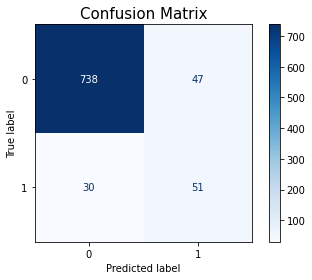

In [ ]:
# 3) 모델 성능 확인 시각화 (Confusion Matrix, ROC Curve)
# 3)-(1) Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots() 
pcm = plot_confusion_matrix(random_forest, X_val, y_val, cmap = plt.cm.Blues, ax = ax)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

Text(0, 0.5, 'TPR(Recall)')

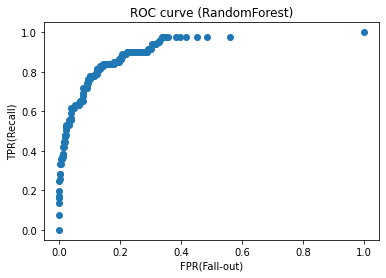

In [ ]:
# 3) 모델 성능 확인 시각화 (Confusion Matrix, ROC Curve)
# 3)-(2) ROC curve
pred_proba_rf = random_forest.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, pred_proba_rf)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr,
    'TPR(Recall)': tpr,
    'Threshold': thresholds
})
plt.scatter(fpr, tpr)
plt.title('ROC curve (RandomForest)')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

### XGBoost

In [ ]:
# 1) RandomizedSearchCV를 이용, 최적 파라미터 찾기
xgb = XGBClassifier()

params1 = {    
        'learning_rate': uniform(0.6, 1), # [0.0001, 0.001, 0.01, 0.1]
        'n_estimators': randint(50, 500), # range(50, 300, 50)
        'max_depth': randint(6, 10) 
        # 'verbosity': [0, 1, 2, 3]
        }
    
xgb_cv = RandomizedSearchCV(
    xgb, 
    param_distributions = params1, 
    n_iter = 5, 
    cv = 3, 
    scoring = 'roc_auc',
    # random_state = 42,
    verbose = 1,
    n_jobs = -1
    )

xgb_cv.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe57057ba90>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe5f2092350>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe57057a090>},
                   scoring='roc_auc', verbose=1)

In [ ]:
print("Best parameters: ", xgb_cv.best_params_)
print("roc_auc_score: ", xgb_cv.best_score_)

Best parameters:  {'learning_rate': 0.9945680300749745, 'max_depth': 7, 'n_estimators': 475}
roc_auc_score:  0.9918858390396145


In [ ]:
# 2) 최적 파라미터로 모델 학습 및 성능 확인
xgboost = XGBClassifier(learning_rate = 0.9945680300749745, max_depth = 7, n_estimators = 475)
xgboost.fit(X_train_over, y_train_over)

XGBClassifier(learning_rate=0.9945680300749745, max_depth=7, n_estimators=475)

In [ ]:
# get_model_eval
get_model_eval(xgboost, X_train_over, X_val, y_train_over, y_val)

Confusion Matrix :
 [[756  29]
 [ 31  50]]
Accuracy :  0.930715935334873
Precision :  0.6329113924050633
Recall :  0.6172839506172839
f1 score :  0.6250000000000001
roc_auc score :  0.9040496972556421


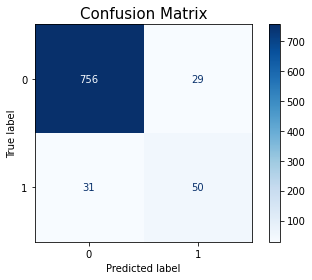

In [ ]:
# 3) 모델 성능 확인 시각화 (Confusion Matrix, ROC Curve)
# 3)-(1) Confusion Matrix
fig, ax = plt.subplots() 
pcm = plot_confusion_matrix(xgboost, X_val, y_val, cmap = plt.cm.Blues, ax = ax)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

Text(0, 0.5, 'TPR(Recall)')

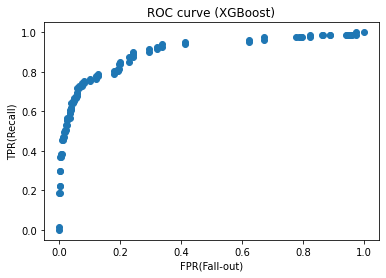

In [ ]:
# 3) 모델 성능 확인 시각화 (Confusion Matrix, ROC Curve)
# 3)-(2) ROC curve
pred_proba_xgb = xgboost.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, pred_proba_xgb)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr,
    'TPR(Recall)': tpr,
    'Threshold': thresholds
})
plt.scatter(fpr, tpr)
plt.title('ROC curve (XGBoost)')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

- **결론**: **RandomForestClassifier** 모델의 성능이 가장 높게 나타남.
(f1-score, auc score 유사했던 xgboost 함께 randomizedsearchcv 진행함)

# 최종모델 재학습
"만약 여러분이 hold-out 교차검증(훈련/검증/테스트 세트로 한 번만 나누어 실험)을 수행한 경우에는, (훈련+검증) 데이터셋에서 최적화된 하이퍼파라미터로 최종 모델을 재학습(refit) 해야 합니다."

In [ ]:
# hold-out CV: 테스트 데이터셋에서 최적화된 하이퍼파라미터로 최종 모델 재학습
random_forest = RandomForestClassifier(max_depth = None, max_features = 0.48911022897244416, min_samples_leaf = 1, n_estimators = 453)
random_forest.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features=0.48911022897244416, n_estimators=453)

In [ ]:
# get_model_eval
y_test = test[target] # target = 'PotentialFraud'
get_model_eval(random_forest, X_train_over, X_test, y_train_over, y_test)

# y_pred = random_forest.predict(X_test)
# y_pred_proba = random_forest.predict_proba(X_test)[:,1] # 테스트 데이터 예측 1의 확률
# get_clf_eval(y_val, y_pred, y_pred_proba) # y_test, y_pred, y_pred_proba 를 바탕으로 다양한 평가지표 산출(유틸리티 함수)

#def get_model_eval(model, X_train, X_val, y_train, y_val):
#    model.fit(X_train, y_train)
#    y_pred = model.predict(X_val) # 예측 확률값
#    y_pred_proba = model.predict_proba(X_val)[:,1] # 1의 확률 array
#    get_clf_eval(y_val, y_pred, y_pred_proba)

#def get_clf_eval(y_true, y_pred, y_pred_proba):
#    print('Confusion Matrix :\n', confusion_matrix(y_true, y_pred)) # "오차행렬"
#    print('Accuracy : ', accuracy_score(y_true, y_pred))
#    print('Precision : ', precision_score(y_true, y_pred))
#    print('Recall : ', recall_score(y_true, y_pred))
#    print('f1 score : ', f1_score(y_true, y_pred))
#    print('roc_auc score : ', roc_auc_score(y_true, y_pred_proba))

Confusion Matrix :
 [[914  67]
 [ 29  72]]
Accuracy :  0.911275415896488
Precision :  0.5179856115107914
Recall :  0.7128712871287128
f1 score :  0.5999999999999999
roc_auc score :  0.9425722388752636


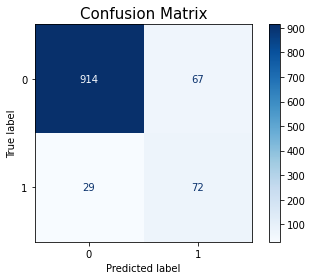

In [ ]:
# 3) 테스트 데이터에서 성능 확인 시각화 (Confusion Matrix, ROC Curve)
# 3)-(1) Confusion Matrix
fig, ax = plt.subplots() 
pcm = plot_confusion_matrix(random_forest, X_test, y_test, cmap = plt.cm.Blues, ax = ax)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

Test AUC =  0.9425722388752636


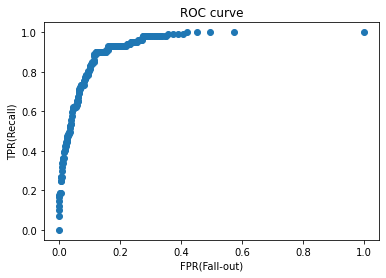

In [ ]:
# 3) 테스트 데이터에서 성능 확인 시각화 (Confusion Matrix, ROC Curve)
# 3)-(2) ROC curve

# y_pred = model.predict_proba(X_train)[:,1] # predict the probability of train data
pred_proba_test = random_forest.predict_proba(X_test)[:,1]
# pred_proba_xgb = xgboost.predict_proba(X_val)[:,1]
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, pred_proba_test)

roc = pd.DataFrame({
    'FPR(Fall-out)': test_fpr,
    'TPR(Recall)': test_tpr,
    'Threshold': test_thresholds
})
plt.scatter(test_fpr, test_tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

# calculate auc for train and test
test_auc = auc(test_fpr, test_tpr)
print("Test AUC = ", test_auc)

In [ ]:
# 참고. 레퍼런스 코드
#def validate_test_model(clf, x_test, y_test, best_t):
#    # predict the probability of test data
#    y_test_pred = pred_prob(clf, x_test)
#    # calculate tpr, fpr for diffeent thresholds using roc_curve
#    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
#    
#    # calculate auc for train and test
#    test_auc = auc(test_fpr, test_tpr)
#    print("Test AUC = ", test_auc)
#    
#    draw_test_roc(test_fpr, test_tpr)
#    #def draw_test_confusion_matrix(best_t, x_test, y_test, y_test_pred):
#    test_prediction = draw_test_confusion_matrix(best_t, x_test, y_test, y_test_pred)
#    test_f1_score = f1_score(y_test, test_prediction)
#    return test_auc, test_f1_score

# 최종모델 설명
- 여러 수치적 지표 및 permutation importance, pdp, shap 등을 활용해 최종모델 설명 (시각화는 설명이 가장 중요)
- 1.에서 제시한 가설 해결

- 교차검증이나 hold-out 기법을 사용해 학습 성능/일반화 성능 구분하여 제시
- 1.에서 제시한 가설 해결

Q1. 학습한 모델이 기준모델보다 성능이 잘 나왔나? 그렇지 않다면 이유는?<br>
Q2. 모델 성능 개선을 위해 어떤 방법을 적용했나? 그 방법을 선택한 이유는?<br>
Q3. 최종 모델과 일반화 성능에 관해 설명<br>

## 특성 중요도

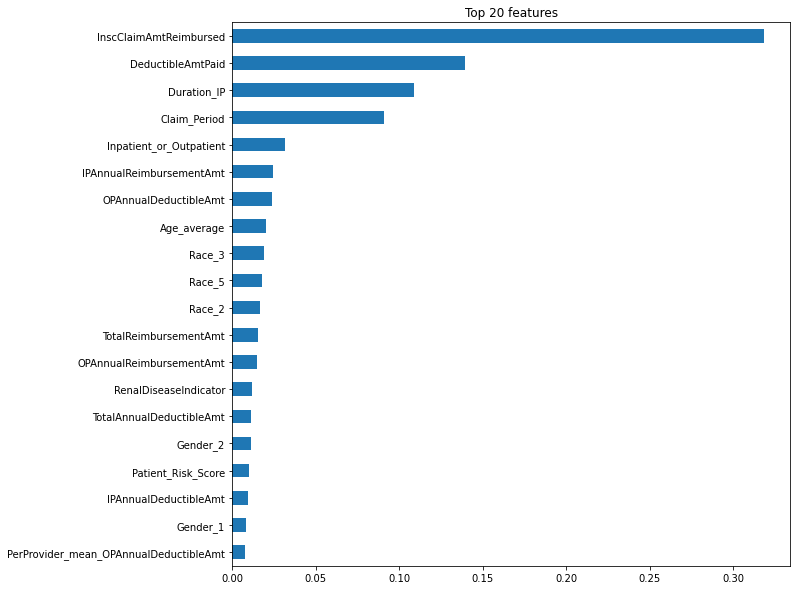

In [ ]:
# random_forest = RandomForestClassifier(max_depth = 20, max_features = 0.2692613453110473, min_samples_leaf = 2, n_estimators = 236)
importances = pd.Series(random_forest.feature_importances_, X_train_over.columns)

%matplotlib inline
# import matplotlib.pyplot as plt

n = 20
plt.figure(figsize = (10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [ ]:
importances.sort_values(ascending = False)

InscClaimAmtReimbursed                       0.318232
DeductibleAmtPaid                            0.139329
Duration_IP                                  0.109085
Claim_Period                                 0.090805
Inpatient_or_Outpatient                      0.031667
IPAnnualReimbursementAmt                     0.024484
OPAnnualDeductibleAmt                        0.023806
Age_average                                  0.020394
Race_3                                       0.019011
Race_5                                       0.017983
Race_2                                       0.016942
TotalReimbursementAmt                        0.015687
OPAnnualReimbursementAmt                     0.014985
RenalDiseaseIndicator                        0.012217
TotalAnnualDeductibleAmt                     0.011434
Gender_2                                     0.011269
Patient_Risk_Score                           0.009920
IPAnnualDeductibleAmt                        0.009751
Gender_1                    

In [ ]:
# 카디널리티 확인 함수 (in 렉처노트)
# 특성 중요도가 높게 나온 ( )는 유의해서 봐야한다. ()개 카테고리로 구성되어 있는데 다른 특성과 비교하여 상대적으로 high-cardinality 특성 - 트리 구성 중 분기에 이용될 확률이 높아 과적합 위험

In [ ]:
len(X_train['InscClaimAmtReimbursed'].value_counts())

2575

In [ ]:
len(X_train['DeductibleAmtPaid'].value_counts())

890

In [ ]:
len(X_train['Duration_IP'].value_counts())

368

In [ ]:
len(X_train['Claim_Period'].value_counts())

371

In [ ]:
len(X_train['Inpatient_or_Outpatient'].value_counts())

131

## 순열 중요도

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 15.9 MB/s 
     |████████████████████████████████| 133 kB 64.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=227753f63376cda727fc22f81d4c99b975f2f1c0241c6b63d11ead9ea79a76cc
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inc

In [ ]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance
permuter = PermutationImportance(
    random_forest,
    scoring = 'roc_auc', 
    n_iter = 5
    )

permuter.fit(X_test, y_test)
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()


ChronicCond_Alzheimer                       -0.002657
TotalReimbursementAmt                       -0.001931
PerProvider_mean_OPAnnualDeductibleAmt      -0.001657
TotalAnnualDeductibleAmt                    -0.001534
PerProvider_mean_Patient_Age                -0.000722
PerProvider_count_ClaimID                   -0.000522
PerProvider_mean_OPAnnualReimbursementAmt   -0.000392
Claimed_extra                               -0.000311
PerProvider_mean_IPAnnualDeductibleAmt      -0.000289
IPAnnualReimbursementAmt                    -0.000155
Race_1                                      -0.000151
IPAnnualDeductibleAmt                       -0.000125
PerProvider_count_Claims                     0.000036
PerProvider_mean_IPAnnualReimbursementAmt    0.000082
PerProvider_mean_InscClaimAmtReimbursed      0.000178
NoOfMonths_PartBCov                          0.000429
NoOfMonths_PartACov                          0.000689
PerProvider_mean_Patient_Risk_Score          0.001041
OPAnnualDeductibleAmt       

In [ ]:
eli5.show_weights(
    permuter, 
    top = None, 
    feature_names = feature_names
    )

# Weight	Feature
# 0.0571 ± 0.0074	Claim_Period
# 0.0455 ± 0.0171	InscClaimAmtReimbursed
# 0.0419 ± 0.0100	Duration_IP
# 0.0370 ± 0.0042	Inpatient_or_Outpatient
# 0.0270 ± 0.0099	PerProvider_mean_DeductibleAmtPaid
# 0.0216 ± 0.0055	Race_2

Weight,Feature
0.0615 ± 0.0042,Claim_Period
0.0605 ± 0.0102,Duration_IP
0.0488 ± 0.0048,InscClaimAmtReimbursed
0.0396 ± 0.0042,Inpatient_or_Outpatient
0.0241 ± 0.0134,DeductibleAmtPaid
0.0194 ± 0.0013,Race_2
0.0126 ± 0.0034,RenalDiseaseIndicator
0.0125 ± 0.0048,PerProvider_mean_Duration_IP
0.0121 ± 0.0014,PerProvider_mean_DeductibleAmtPaid
0.0121 ± 0.0030,PerProvider_mean_Claim_Period


## PDP

### 1 PDP

In [ ]:
# pip install wheel

In [ ]:
# !pip3 install --user matplotlib

In [ ]:
!pip install pdpbox
# !pip3 install pdpbox --user 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.3 MB/s 
     |████████████████████████████████| 13.1 MB 17.5 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=81af6c92641f67f5d16260fc85e207596fbf02913741f74c7614bddd73f986b1
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


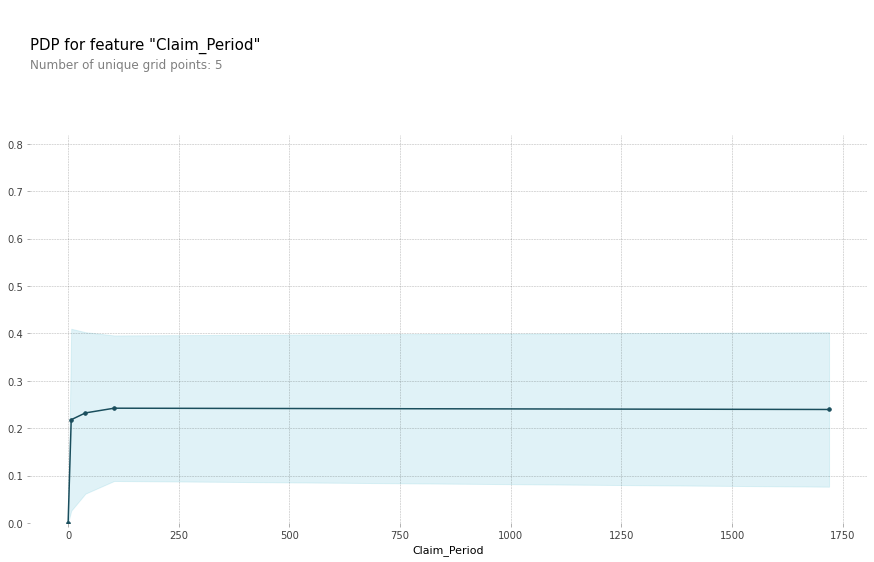

In [ ]:
# 1. Claim_Period (1 pdp)
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Claim_Period' # 수치형
isolated = pdp_isolate(
    model = random_forest,
    dataset = X_test,
    model_features = X_test.columns,
    feature = feature
)
pdp_plot(isolated, feature_name = feature);

(<Figure size 1080x684 with 3 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe57033ec50>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe57025f1d0>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe56ffea450>})

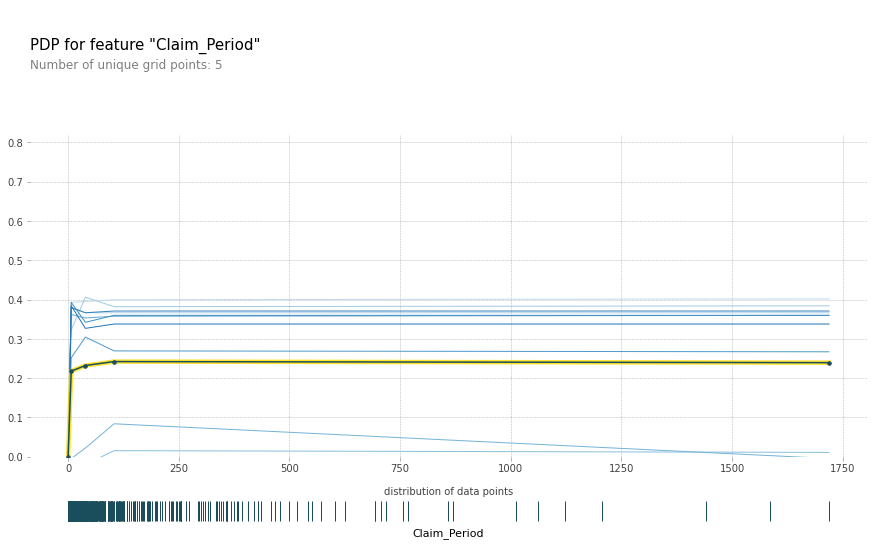

In [ ]:
# ICE curve와 함께 그려보기 - ICE의 평균이 PDP
pdp_plot(isolated,
         feature_name = feature, 
         plot_lines = True, # ICE Plots
         frac_to_plot = 10, # or 10 (# 10000 val set * 0.001),
         plot_pts_dist = True
         )     

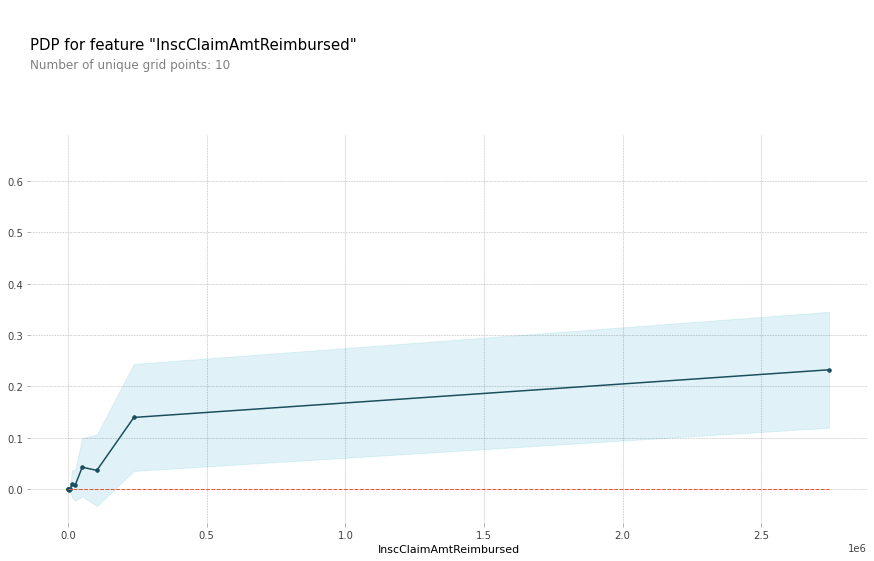

In [ ]:
# 2. InscClaimAmtReimbursed (1 pdp)
from pdpbox.pdp import pdp_isolate, pdp_plot
# InscClaimAmtReimbursed
feature = 'InscClaimAmtReimbursed' # 수치형
isolated = pdp_isolate(
    model = random_forest,
    dataset = X_test,
    model_features = X_test.columns,
    feature = feature
)
pdp_plot(isolated, feature_name = feature);

(<Figure size 1080x684 with 3 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe56fccbb10>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe56fc9c690>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe56fe702d0>})

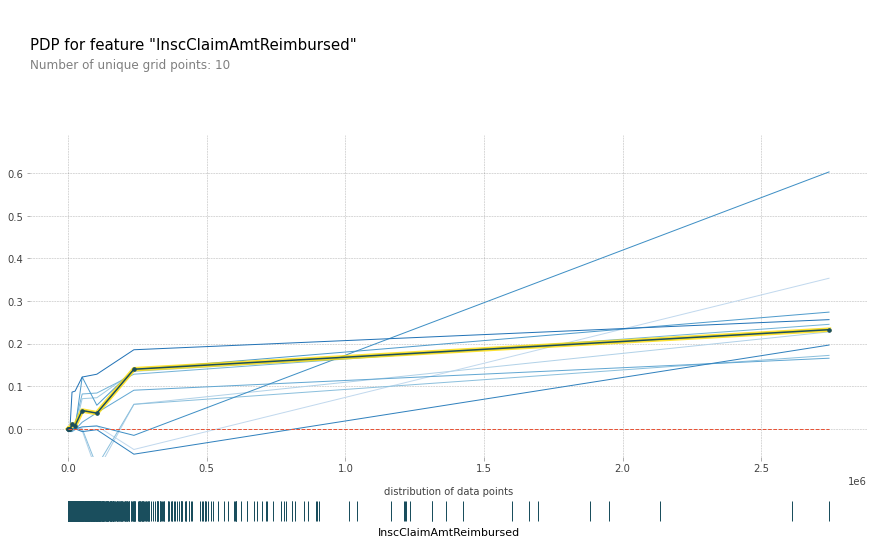

In [ ]:
# ICE curve와 함께 그려보기 - ICE의 평균이 PDP
pdp_plot(isolated,
         feature_name = feature, 
         plot_lines = True, # ICE Plots
         frac_to_plot = 10, # or 10 (# 10000 val set * 0.001),
         plot_pts_dist = True
         )

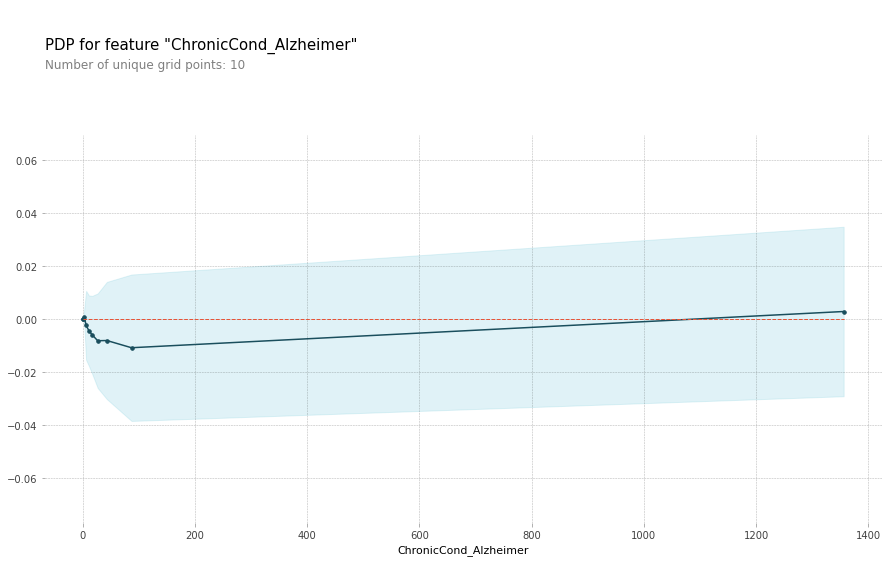

In [ ]:
# 3. ChronicCond_Alzheimer (1 pdp)
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'ChronicCond_Alzheimer'
isolated = pdp_isolate(
    model = random_forest,
    dataset = X_test,
    model_features = X_test.columns,
    feature = feature
)
pdp_plot(isolated, feature_name = feature);

(<Figure size 1080x684 with 3 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe56fad6750>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe56faa3410>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe56fc18dd0>})

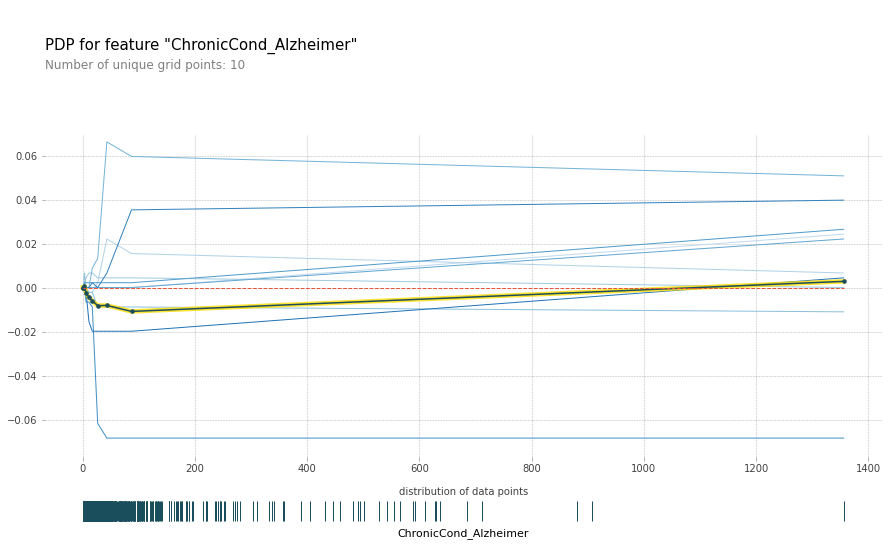

In [ ]:
# ICE curve와 함께 그려보기 - ICE의 평균이 PDP
pdp_plot(isolated,
         feature_name = feature, 
         plot_lines = True, # ICE Plots
         frac_to_plot = 10, # or 10 (# 10000 val set * 0.001),
         plot_pts_dist = True
         )

### 2 PDP

(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe65207e090>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe57055c3d0>})

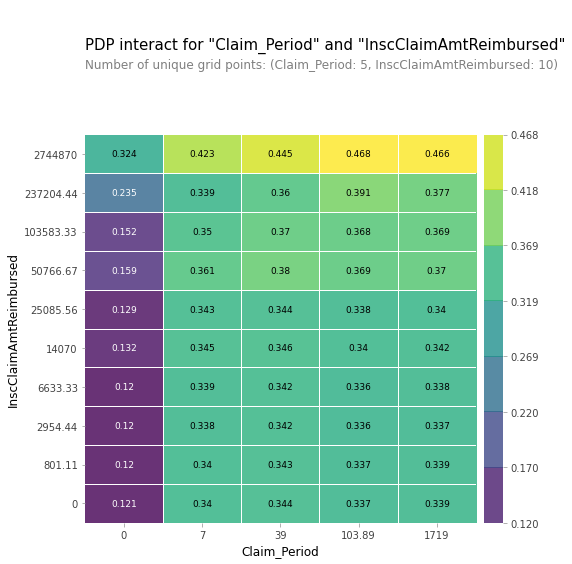

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['Claim_Period', 'InscClaimAmtReimbursed'] # 수치형

interaction = pdp_interact(
    model = random_forest,
    dataset = X_test,
    model_features = X_test.columns,
    features = features
)

pdp_interact_plot(interaction, plot_type = 'grid', feature_names = features)

## Shapley value

### 분류기 학습 등

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 12.4 MB/s 


In [ ]:
y_train.value_counts(normalize = True)

0    0.906412
1    0.093588
Name: PotentialFraud, dtype: float64

In [ ]:
ratio = 0.09/0.91 # 클래스 비율 0 / 1 (약 10 / 90)
ratio

0.0989010989010989

In [ ]:
eval_set1 = [(X_train, y_train), 
            (X_val, y_val)]
eval_set2 = [(X_train_over, y_train_over), 
            (X_val, y_val)]

In [ ]:
# XGBoost 분류기 학습1
# random_forest = RandomForestClassifier(max_depth = None, max_features = 0.5393644114450201, min_samples_leaf = 1, n_estimators = 473)
# random_forest.fit(X_train_over, y_train_over, eval_set = eval_set)

from xgboost import XGBClassifier
model1 = XGBClassifier(n_estimators=1000, verbosity=0, n_jobs=-1, scale_pos_weight=ratio)
model1.fit(X_train, y_train, eval_set = eval_set1, eval_metric = 'auc', early_stopping_rounds=10)

[0]	validation_0-auc:0.784784	validation_1-auc:0.738704
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.785996	validation_1-auc:0.739475
[2]	validation_0-auc:0.841625	validation_1-auc:0.811465
[3]	validation_0-auc:0.873485	validation_1-auc:0.820288
[4]	validation_0-auc:0.873508	validation_1-auc:0.820288
[5]	validation_0-auc:0.874065	validation_1-auc:0.82131
[6]	validation_0-auc:0.874079	validation_1-auc:0.82131
[7]	validation_0-auc:0.873965	validation_1-auc:0.821302
[8]	validation_0-auc:0.873975	validation_1-auc:0.821302
[9]	validation_0-auc:0.874612	validation_1-auc:0.82083
[10]	validation_0-auc:0.874664	validation_1-auc:0.821098
[11]	validation_0-auc:0.880891	validation_1-auc:0.84332
[12]	validation_0-auc:0.880873	validation_1-auc:0.84332
[13]	validation_0-auc:0.880804	validation_1-auc:0.843021
[14]	validation_0-auc:0.881022	validation_1-auc:0.843037
[15

XGBClassifier(n_estimators=1000, n_jobs=-1, scale_pos_weight=0.0989010989010989,
              verbosity=0)

In [ ]:
# XGBoost 분류기 학습2 (v)
# random_forest = RandomForestClassifier(max_depth = None, max_features = 0.5393644114450201, min_samples_leaf = 1, n_estimators = 473)
# random_forest.fit(X_train_over, y_train_over, eval_set = eval_set)

model2 = XGBClassifier(n_estimators=1000, verbosity=0, n_jobs=-1, scale_pos_weight = 1) # 0.5/0.5
model2.fit(X_train_over, y_train_over, eval_set = eval_set2, eval_metric = 'auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.948051	validation_1-auc:0.892616
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.952035	validation_1-auc:0.897146
[2]	validation_0-auc:0.953235	validation_1-auc:0.89952
[3]	validation_0-auc:0.955774	validation_1-auc:0.906173
[4]	validation_0-auc:0.956261	validation_1-auc:0.907376
[5]	validation_0-auc:0.957105	validation_1-auc:0.905921
[6]	validation_0-auc:0.95743	validation_1-auc:0.911072
[7]	validation_0-auc:0.957965	validation_1-auc:0.919242
[8]	validation_0-auc:0.958155	validation_1-auc:0.920044
[9]	validation_0-auc:0.958251	validation_1-auc:0.920815
[10]	validation_0-auc:0.958432	validation_1-auc:0.921082
[11]	validation_0-auc:0.958504	validation_1-auc:0.921727
[12]	validation_0-auc:0.95868	validation_1-auc:0.921743
[13]	validation_0-auc:0.960189	validation_1-auc:0.921019
[14]	validation_0-auc:0.960458	validation_1-auc:0.921184
[

XGBClassifier(n_estimators=1000, n_jobs=-1, verbosity=0)

In [ ]:
# from sklearn.metrics import roc_auc_score 1
class_index = 1
y_pred_proba1 = model1.predict_proba(X_test)[:, class_index]
print(f'Test AUC for class "{model1.classes_[class_index]}":')
print(roc_auc_score(y_test, y_pred_proba1)) # 범위는 0~1, 수치는 높을수록 좋다

Test AUC for class "1":
0.9338621935588055


In [ ]:
# from sklearn.metrics import roc_auc_score 2
class_index = 1
y_pred_proba2 = model2.predict_proba(X_test)[:, class_index]
print(f'Test AUC for class (Oversampling) "{model2.classes_[class_index]}":')
print(roc_auc_score(y_test, y_pred_proba2)) # 범위는 0~1, 수치는 높을수록 좋다

Test AUC for class (Oversampling) "1":
0.9442779140299351


In [ ]:
# Confusion Matrix 확인1
# from sklearn.metrics import classification_report
y_test_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       981
           1       0.95      0.21      0.34       101

    accuracy                           0.93      1082
   macro avg       0.94      0.60      0.65      1082
weighted avg       0.93      0.93      0.90      1082



In [ ]:
# Confusion Matrix 확인2
# from sklearn.metrics import classification_report
y_test_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       981
           1       0.39      0.90      0.55       101

    accuracy                           0.86      1082
   macro avg       0.69      0.88      0.73      1082
weighted avg       0.93      0.86      0.88      1082



In [ ]:
y_pred_proba2

array([0.43860966, 0.22068948, 0.69380337, ..., 0.13849854, 0.22068948,
       0.13849854], dtype=float32)

In [ ]:
# 예측값 VS. 실제값 비교
# 'Provider'?
provider_count = X_test['PerProvider_count_Claims']
df_p = pd.DataFrame({
    'PerProvider_count_Claims': provider_count, 
    'pred_proba': y_pred_proba2, # 예측확률 
    'status_group': y_test # 실제값
}) # df_p.shape:(1082, 3)

df_p = df_p.merge(X_test[['PerProvider_count_Claims', 'InscClaimAmtReimbursed', 'PerProvider_mean_Claim_Period', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 'Claim_Period', 'Duration_IP', 'PerProvider_mean_Duration_IP']], 
                  how='left') # df_p.shape: (16026, 11) ???????
			

In [ ]:
# 선택하여 열 이름 변경하기: df.rename(columns={'Before':'After'})
df_p.rename(columns={'PerProvider_count_Claims':'provider_count'})

,provider_count,pred_proba,status_group,InscClaimAmtReimbursed,PerProvider_mean_Claim_Period,DeductibleAmtPaid,RenalDiseaseIndicator,Claim_Period,Duration_IP,PerProvider_mean_Duration_IP
0,20,0.438610,1,41860,0.007875,6458.0,10,63.0,63.0,0.007875
1,20,0.438610,1,7230,0.000000,10.0,6,0.0,0.0,0.000000
2,20,0.438610,1,111530,0.011375,12816.0,8,91.0,91.0,0.011375
3,20,0.438610,1,177000,0.018750,21360.0,10,150.0,150.0,0.018750
4,20,0.438610,1,4770,0.000000,60.0,3,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
14995,33,0.138499,0,5530,0.000000,0.0,8,0.0,0.0,0.000000
14996,33,0.138499,0,332690,0.004313,24564.0,7,155.0,155.0,0.004313
14997,33,0.138499,0,6060,0.000000,100.0,6,0.0,0.0,0.000000
14998,33,0.138499,0,60790,0.001030,7686.0,8,37.0,37.0,0.001030


In [ ]:
fraud = df_p['status_group'] == 1
not_fraud = ~fraud
right = (fraud) == (df_p['pred_proba'] > 0.50)
wrong = ~right

### fraud & right

In [ ]:
# TP: fraud & right
df_p[fraud&right].sample(n=10, random_state = 1).sort_values(by='pred_proba')

,PerProvider_count_Claims,pred_proba,status_group,InscClaimAmtReimbursed,PerProvider_mean_Claim_Period,DeductibleAmtPaid,RenalDiseaseIndicator,Claim_Period,Duration_IP,PerProvider_mean_Duration_IP
1243,111,0.514424,1,117200,0.000053,11100.0,32,72.0,72.0,0.000053
3096,5,0.549085,1,550,0.000000,0.0,0,0.0,0.0,0.000000
3107,5,0.549085,1,1860,0.048000,1068.0,1,6.0,6.0,0.048000
2476,135,0.608951,1,161630,0.000036,9912.0,8,89.0,89.0,0.000036
3780,20,0.616670,1,177000,0.018750,21360.0,10,150.0,150.0,0.018750
8330,220,0.744659,1,321470,0.000016,25264.0,20,169.0,169.0,0.000016
13529,29,0.748704,1,11050,0.000000,180.0,7,0.0,0.0,0.000000
456,86,0.779999,1,31040,0.000008,1238.0,13,5.0,5.0,0.000008
8163,44,0.803711,1,25050,0.000141,3254.0,11,12.0,12.0,0.000141
6850,94,0.846937,1,20410,0.000000,670.0,30,0.0,0.0,0.000000


In [ ]:
# 테스트셋 301번 데이터 .shape: (1, 37)
row = X_test.iloc[[301]]
row 

,InscClaimAmtReimbursed,DeductibleAmtPaid,Duration_IP,Claim_Period,Claimed_extra,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,PerProvider_mean_Patient_Risk_Score,PerProvider_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5,PerProvider_count_Claims,Age_average
4627,63510,7646.0,39.0,39.0,0.0,7,5,792,798,28,...,0.000994,0.014925,22.0,45.0,61.0,3.0,2.0,1.0,67,75.0


In [ ]:
# shap 그래프로 예측 설명
import xgboost
import shap

explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value, 
    shap_values = shap_values, 
    features = row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

In [ ]:
# 예측을 shap 그래프를 통해 설명하는 함수
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

print('fraud 예측에 대한 Positive 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')

print('\n')
print('Negative 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')

fraud 예측에 대한 Positive 요인 Top 3 입니다:
1. Duration_IP : 39.0
2. Race_3 : 2.0
3. RenalDiseaseIndicator : 5.0


Negative 요인 Top 3 입니다:
1. InscClaimAmtReimbursed : 63510.0
2. DeductibleAmtPaid : 7646.0
3. Inpatient_or_Outpatient : 7.0


In [ ]:
def explain(row_number):
    positive_class = 1
    positive_class_index = 1

    # row 값을 변환합니다
    row = X_test.iloc[[row_number]]
    # row_processed = processor.transform(row)

    # 예측하고 예측확률을 얻습니다 
    pred = model2.predict(row)[0] # row_processed
    pred_proba = model2.predict_proba(row)[0, positive_class_index] # row_processed
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba

    # 예측결과와 확률값을 얻습니다
    print(f'이 보험 청구건에 대한 예측결과는 {pred} 으로, 확률은 {pred_proba:.0f}% 입니다.')
    
    # SHAP를 추가합니다
    shap_values = explainer.shap_values(row) # row_processed

    # Fully Paid에 대한 top 3 pros, cons를 얻습니다
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # 예측에 가장 영향을 준 top3
    print('\n')
    print('Positive 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # 예측에 가장 반대적인 영향을 준 요인 top1
    print('\n')
    print('Negative 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = cons if pred == positive_class else pros
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # SHAP
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit'
    )

In [ ]:
explain(301)

이 보험 청구건에 대한 예측결과는 1 으로, 확률은 51% 입니다.


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. Duration_IP : 39.0
2. Race_3 : 2.0
3. RenalDiseaseIndicator : 5.0


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. InscClaimAmtReimbursed : 63510.0
2. DeductibleAmtPaid : 7646.0
3. Inpatient_or_Outpatient : 7.0


### not_fraud & right

In [ ]:
# TN: not_fraud & right
df_p[not_fraud & right].sample(n=10).sort_values(by='pred_proba')

,PerProvider_count_Claims,pred_proba,status_group,InscClaimAmtReimbursed,PerProvider_mean_Claim_Period,DeductibleAmtPaid,RenalDiseaseIndicator,Claim_Period,Duration_IP,PerProvider_mean_Duration_IP
7331,2,0.138499,0,860,0.000,50.0,0,0.0,0.0,0.000
14551,5,0.138499,0,29000,0.368,5340.0,0,46.0,46.0,0.368
5040,15,0.138499,0,3310,0.000,0.0,9,0.0,0.0,0.000
1623,2,0.138499,0,800,0.000,0.0,1,0.0,0.0,0.000
13760,5,0.138499,0,280,0.000,90.0,0,0.0,0.0,0.000
3161,2,0.138499,0,80,0.000,0.0,0,0.0,0.0,0.000
5705,1,0.138499,0,10,0.000,0.0,0,0.0,0.0,0.000
4203,5,0.138499,0,320,0.000,0.0,0,0.0,0.0,0.000
7879,1,0.138499,0,57000,16.000,1068.0,1,16.0,18.0,18.000
10414,5,0.138499,0,1400,0.000,40.0,2,0.0,0.0,0.000


In [ ]:
# 예시. 테스트셋 793번 데이터
pre = model2.predict(X_test.iloc[[793]])[0] # row_processed
pre_pro = model2.predict_proba(X_test.iloc[[793]])[0, 1]
pre, pre_pro # 86%가 됨

(0, 0.13849854)

In [ ]:
explain(793)

이 보험 청구건에 대한 예측결과는 0 으로, 확률은 86% 입니다.


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. InscClaimAmtReimbursed : 10490.0
2. Duration_IP : 0.0
3. DeductibleAmtPaid : 0.0


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. Inpatient_or_Outpatient : 0.0
2. Race_5 : 2.0
3. Race_3 : 1.0


### not_fraud & wrong

In [ ]:
# FP: not_fraud & wrong
df_p[not_fraud & wrong].sample(n=10).sort_values(by='pred_proba')

,PerProvider_count_Claims,pred_proba,status_group,InscClaimAmtReimbursed,PerProvider_mean_Claim_Period,DeductibleAmtPaid,RenalDiseaseIndicator,Claim_Period,Duration_IP,PerProvider_mean_Duration_IP
3774,67,0.512462,0,123600,0.000236,10810.0,8,71.0,71.0,0.000236
1591,195,0.514424,0,98480,0.000006,10152.0,33,45.0,45.0,0.000006
9360,25,0.514424,0,48930,0.000896,4382.0,10,14.0,14.0,0.000896
8278,89,0.540124,0,514980,0.000418,42900.0,18,295.0,295.0,0.000418
6875,6,0.545675,0,6630,0.000000,0.0,3,0.0,0.0,0.000000
10401,56,0.569203,0,10250,0.000000,100.0,0,0.0,0.0,0.000000
14590,28,0.583786,0,10360,0.000000,130.0,5,0.0,0.0,0.000000
14593,28,0.583786,0,161420,0.003280,10760.0,7,72.0,72.0,0.003280
10346,36,0.616670,0,6400,0.000000,130.0,4,0.0,0.0,0.000000
7948,85,0.779999,0,22560,0.000000,280.0,19,0.0,0.0,0.000000


In [ ]:
X_test.iloc[[794]]

,InscClaimAmtReimbursed,DeductibleAmtPaid,Duration_IP,Claim_Period,Claimed_extra,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,PerProvider_mean_Patient_Risk_Score,PerProvider_count_ClaimID,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5,PerProvider_count_Claims,Age_average
5132,33620,410.0,0.0,0.0,0.0,0,23,1236,1248,36,...,0.000412,0.009615,27.0,77.0,103.0,1.0,0.0,0.0,104,76.0


In [ ]:
# 예시. 테스트셋 10번 데이터
#pre = model2.predict(X_test.iloc[[10]])[0] # row_processed
#pre_pro = model2.predict_proba(X_test.iloc[[10]])[0, 1]
#pre, pre_pro # %가 됨

(0, 0.19567862)

In [ ]:
#explain(10)

### fraud & wrong

In [ ]:
# FN: fraud & wrong
df_p[fraud & wrong].sample(n=5).sort_values(by='pred_proba')

,PerProvider_count_Claims,pred_proba,status_group,InscClaimAmtReimbursed,PerProvider_mean_Claim_Period,DeductibleAmtPaid,RenalDiseaseIndicator,Claim_Period,Duration_IP,PerProvider_mean_Duration_IP
14802,393,0.197713,1,107830,0.0,1290.0,84,0.0,0.0,0.0
2666,18,0.353643,1,2860,0.0,160.0,0,0.0,0.0,0.0
14563,3,0.418351,1,260,0.0,0.0,0,0.0,0.0,0.0
14572,3,0.418351,1,100,0.0,0.0,0,0.0,0.0,0.0
4,20,0.438610,1,4770,0.0,60.0,3,0.0,0.0,0.0


In [ ]:
# 예시. 테스트셋 18번 데이터
#pre = model2.predict(X_test.iloc[[1027]])[0] # row_processed
#pre_pro = model2.predict_proba(X_test.iloc[[1027]])[0, 1]
#pre, pre_pro # 59%가 됨

(1, 0.5796597)

In [ ]:
#explain(186)

### shap.force_plot 시도
> 참고. https://zzinnam.tistory.com/entry/SHAP-value%EC%97%90-%EB%8C%80%ED%95%9C-%EA%B0%84%EB%8B%A8%ED%95%9C-%EC%86%8C%EA%B0%9Cwith-Python


In [ ]:
shap.initjs()
explainer1 = shap.TreeExplainer(model2)
shap_values1 = explainer1.shap_values(X_test)
shap.force_plot(explainer1.expected_value, shap_values1, feature_names=X_test.columns)

# Exception: In v0.20 force_plot now requires the base value as the first parameter! 
# Try shap.force_plot(explainer.expected_value, shap_values) 
# or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

# 감사합니다! (Colab 2/2)